In [2]:
from MoneroAna import *

In [3]:
registry={}
txo = tx("ee45eddf5fb6bc97b5f9e7ab80ae64850cf78c462fdbb9ff63c050e1b47f7317", registry=registry)

In [5]:
from gtda.plotting import plot_diagram

i = 0
diagram = np.copy(txo.rings[0].pers_diagram)
diagram[:,1] = np.log10(diagram[:,1])
plot_diagram(diagram, plotly_params={"layout":{'title':'log(block height) of ring members'}})

In [4]:
txo.rings[0].block_no

[2066715,
 2927466,
 2929755,
 2930529,
 2931284,
 2931399,
 2931423,
 2931713,
 2931812,
 2931830,
 2931856,
 2931881,
 2931907,
 2931909,
 2931913,
 2931914]

In [5]:
deaths = txo.rings[0].pers_diagram[:,1]
deaths

array([1.00000e+00, 2.00000e+00, 4.00000e+00, 1.80000e+01, 2.40000e+01,
       2.50000e+01, 2.60000e+01, 2.60000e+01, 9.90000e+01, 1.15000e+02,
       2.90000e+02, 7.55000e+02, 7.74000e+02, 2.28900e+03, 8.60751e+05])

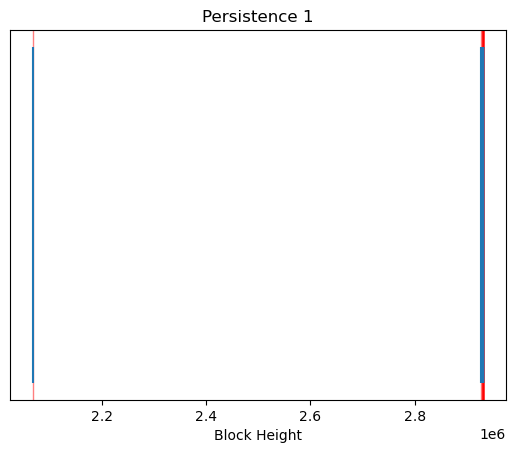

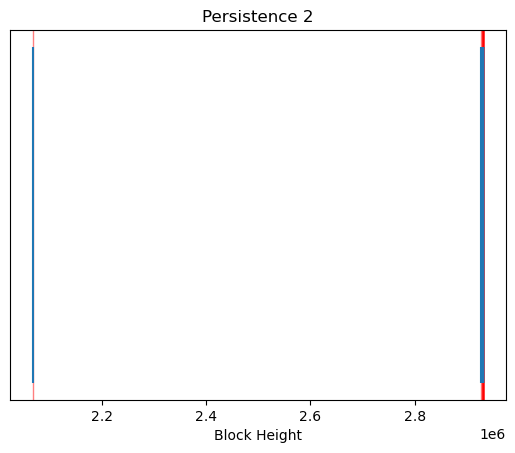

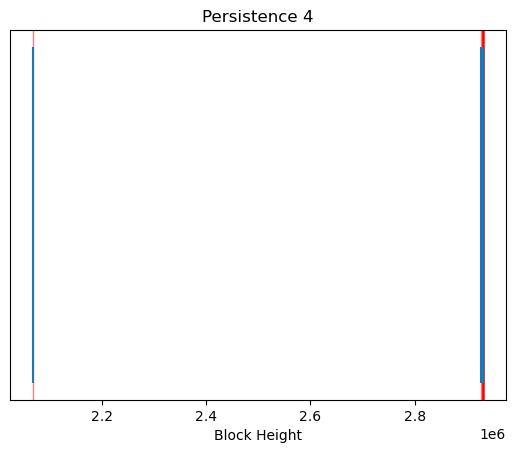

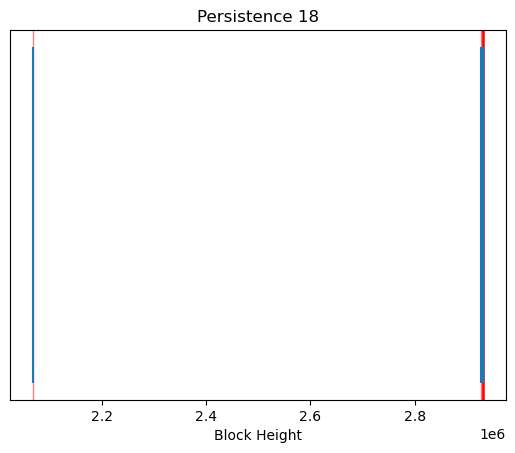

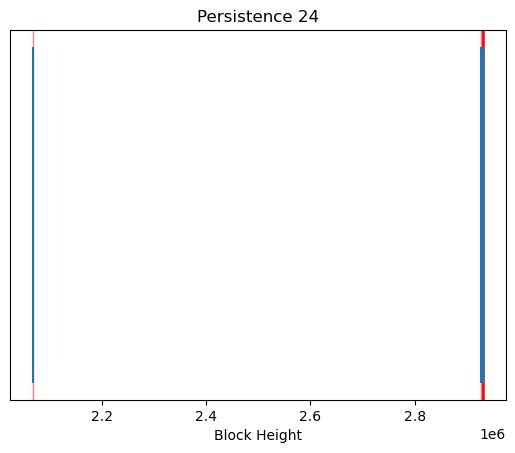

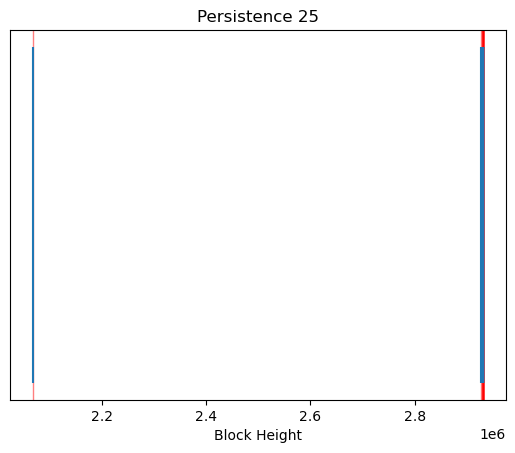

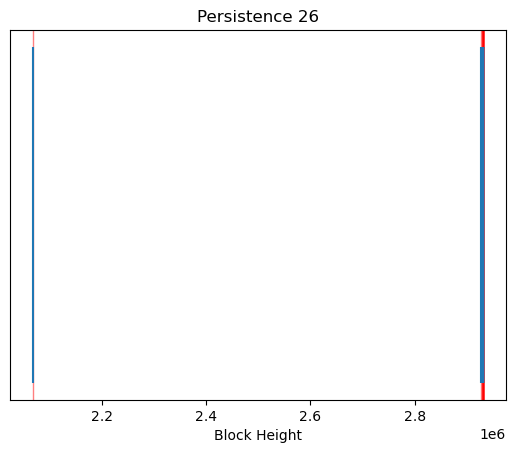

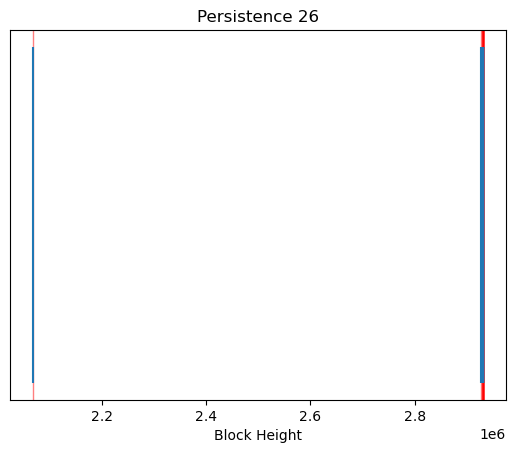

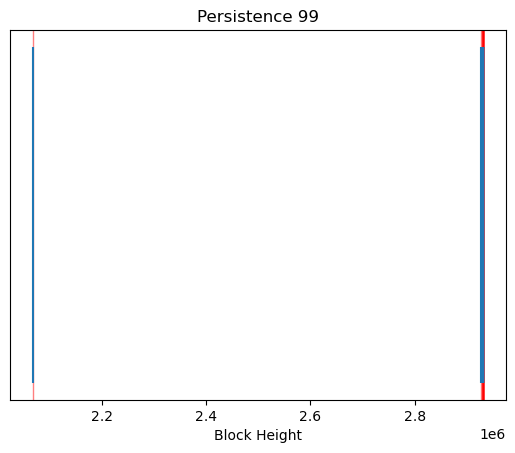

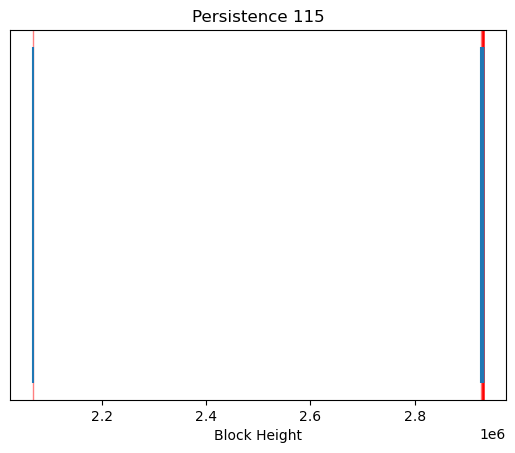

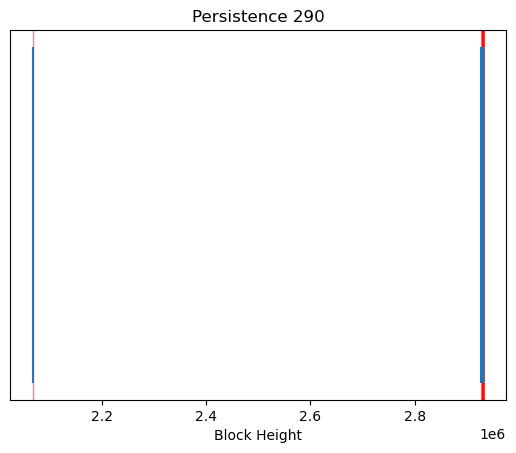

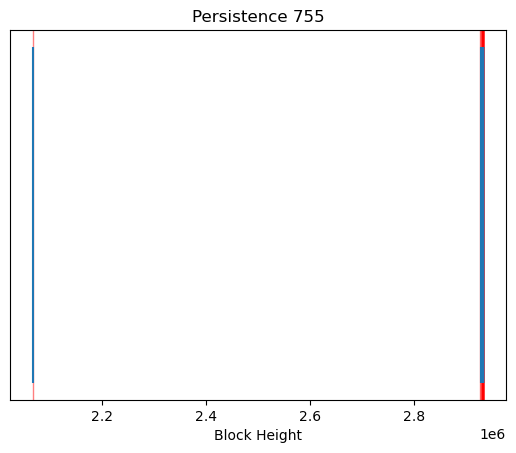

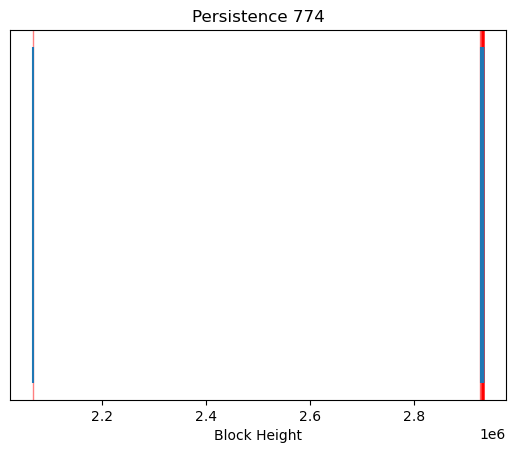

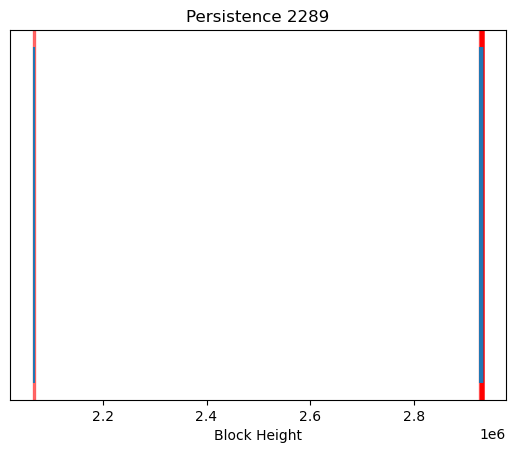

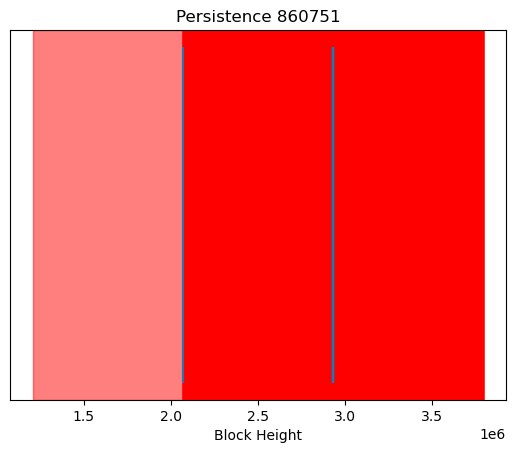

In [6]:
for j in range(15):
    fig, ax = plt.subplots()
    #ax.plot(range(20))
    #ax.axvspan(8, 14, alpha=0.5, color='red')
    for i in txo.rings[0].block_no[:]:
        plt.vlines(i, 0, 1)
        ax.axvspan(i-deaths[j], i+deaths[j], alpha=0.5, color='red')
    #plt.vlines()
    plt.yticks([])
    plt.title("Persistence {}".format(int(deaths[j])))
    plt.xlabel("Block Height")
    plt.savefig('Pers2_{:02d}.png'.format(j), bbox_inches='tight')
    plt.show()


In [7]:
txo.rings[0].block_no

[2066715,
 2927466,
 2929755,
 2930529,
 2931284,
 2931399,
 2931423,
 2931713,
 2931812,
 2931830,
 2931856,
 2931881,
 2931907,
 2931909,
 2931913,
 2931914]

In [8]:
txo.rings[0].pers_diagram

array([[0.00000e+00, 1.00000e+00, 0.00000e+00],
       [0.00000e+00, 2.00000e+00, 0.00000e+00],
       [0.00000e+00, 4.00000e+00, 0.00000e+00],
       [0.00000e+00, 1.80000e+01, 0.00000e+00],
       [0.00000e+00, 2.40000e+01, 0.00000e+00],
       [0.00000e+00, 2.50000e+01, 0.00000e+00],
       [0.00000e+00, 2.60000e+01, 0.00000e+00],
       [0.00000e+00, 2.60000e+01, 0.00000e+00],
       [0.00000e+00, 9.90000e+01, 0.00000e+00],
       [0.00000e+00, 1.15000e+02, 0.00000e+00],
       [0.00000e+00, 2.90000e+02, 0.00000e+00],
       [0.00000e+00, 7.55000e+02, 0.00000e+00],
       [0.00000e+00, 7.74000e+02, 0.00000e+00],
       [0.00000e+00, 2.28900e+03, 0.00000e+00],
       [0.00000e+00, 8.60751e+05, 0.00000e+00]])

In [9]:
union_find = {i:j for i,j in enumerate(txo.rings[0].block_no)}
union_find

{0: 2066715,
 1: 2927466,
 2: 2929755,
 3: 2930529,
 4: 2931284,
 5: 2931399,
 6: 2931423,
 7: 2931713,
 8: 2931812,
 9: 2931830,
 10: 2931856,
 11: 2931881,
 12: 2931907,
 13: 2931909,
 14: 2931913,
 15: 2931914}

In [10]:
idx = {i:i for i in range(16)}
for i in range(15):
    if union_find[idx[i+1]]-union_find[idx[i]] <= deaths[0]:
        idx[i+1]=idx[i]
print(idx)                  

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 14}


In [11]:
#slightly different ordering
print("block height", "".join([" & " + str(i) for i in union_find.values()])+"\\\\")
idx = {i:i for i in range(16)}
cnt = 0
print("iter {}".format(cnt), "".join([" & " + str(i) for i in idx.values()]))
while len(set(idx.values())) > 2:
    for i in range(15):
        if union_find[idx[i+1]]-union_find[idx[i]] <= deaths[cnt]:
            idx[i+1]=idx[i]
    cnt+=1
    #print(cnt, idx.values(), len(set(idx.values()))) 
    print("iter {}".format(cnt), "".join([" & " + str(i) for i in idx.values()])+"\\\\")
print("iter 16", "".join([" & " + str(0) for i in idx.values()])+"\\\\")


block height  & 2066715 & 2927466 & 2929755 & 2930529 & 2931284 & 2931399 & 2931423 & 2931713 & 2931812 & 2931830 & 2931856 & 2931881 & 2931907 & 2931909 & 2931913 & 2931914\\
iter 0  & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 15
iter 1  & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 13 & 14 & 14\\
iter 2  & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 12 & 14 & 14\\
iter 3  & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 & 12 & 14 & 14\\
iter 4  & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 8 & 10 & 11 & 12 & 12 & 12 & 12\\
iter 5  & 0 & 1 & 2 & 3 & 4 & 5 & 5 & 7 & 8 & 8 & 10 & 11 & 12 & 12 & 12 & 12\\
iter 6  & 0 & 1 & 2 & 3 & 4 & 5 & 5 & 7 & 8 & 8 & 10 & 10 & 12 & 12 & 12 & 12\\
iter 7  & 0 & 1 & 2 & 3 & 4 & 5 & 5 & 7 & 8 & 8 & 10 & 10 & 12 & 12 & 12 & 12\\
iter 8  & 0 & 1 & 2 & 3 & 4 & 5 & 5 & 7 & 8 & 8 & 10 & 10 & 12 & 12 & 12 & 12\\
iter 9  & 0 & 1 & 2 & 3 & 4 & 5 & 5 & 7 & 7 & 7 & 10 & 10 & 10 & 10 & 10 & 10\\
iter 10  & 0 & 1 & 2 & 3 &